# Code Environments with OpenAI Gym

In order to implement the agent environment loop, we are going to use a library called OpenAI Gym! 

![AE_loop](https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/LEAD/Reinforcement-Learning/AE_loop.png)

It is possible to generate many different types of environments using open AI gym, and even create your own custom environments using Open AI gym, however we will mostly focus on the already integrated environments in gym.

* [AtariToggle](https://www.gymlibrary.ml/environments/atari/)
* [MuJoCoToggle](https://www.gymlibrary.ml/environments/mujoco/)
* [Toy TextToggle](https://www.gymlibrary.ml/environments/toy_text/)
* [Classic ControlToggle](https://www.gymlibrary.ml/environments/classic_control/)
* [Box2DToggle](https://www.gymlibrary.ml/environments/box2d/)

In this demo we will quickly cover how to setup these different types of environments.

## Atari environments

Atari games have been a very important subject in the history of reinforcement learning (and the history of video games) since Deep Mind developed models that managed to achieve super human performance on these games. However Atari has limited access to their game emulators, so we'll not be able to use this branch of the library unfortunately.

Let's start by creating a virtual environment in order to use gym.

```shell
conda create -n rl
```

To define environments, we need to use the `.make` method from the `gym` library.

In [1]:
!pip install gymnasium

  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.3/944.3 kB 26.4 MB/s eta 0:00:00
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [gymnasium]/4 [cloudpickle]


## General environment generation

This set of environments lets you simulate simple physics problems. Learn more on the [Classic control documentation](https://gymnasium.farama.org/environments/classic_control/).

In [2]:
!pip install gymnasium[classic-control]


zsh:1: no matches found: gymnasium[classic-control]


Use the `.make(...)` method in order to generate the environments.

In [3]:
import gymnasium as gym
env = gym.make("CartPole-v1", render_mode="rgb_array")

In order to initialize the environment, use `.reset()`

In [4]:
env.reset()

(array([ 0.03383716, -0.02039669, -0.03441174, -0.01521016], dtype=float32),
 {})

The state is composed of this set of coordinates:

| Num | Observation | Min | Max |
| --- | ----------- | --- | --- |
| 0 | Cart Position | -4.8 | 4.8 |
| 1 | Cart Velocity | -Inf | Inf |
| 2 | Pole Angle | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |
| 3 | Pole Angular Velocity | -Inf | Inf |

In order to understand the observation space, you my use the `.observation_space` attribute.

In [5]:
env.observation_space

Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)

The action space is accessible through `.action_space`

In [6]:
env.action_space

Discrete(2)

The state space in this case is continuous, but the action space is finite, which makes for a rather moderate reinforcement learning problem.

In order to take an action with the agent you may use the `.step(...)` method.

The result of taking an action contains the next observed state, the reward, the termination status of the episode, and some additional information. There is also a simpler method for taking random actions.

In [7]:
action = env.action_space.sample()
env.step(action)

(array([ 0.03342922,  0.17520143, -0.03471594, -0.3185487 ], dtype=float32),
 1.0,
 False,
 False,
 {})

It is always nice to be able to visualize what the environment looks like at any given time to make sure the agent is picking the appropriate actions. For this you may use the `.render(...)` method, that has two modes `human` which will render the environment in an external visualization window display, and `rgb_array` which will output a numpy array that you can then visualize with `matplotlib` or `plotly`.

In [9]:
env.render()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [13]:
img = env.render()

In [10]:
!pip install pandas plotly matplotlib nbformat

  Using cached plotly-6.2.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached narwhals-1.45.0-py3-none-any.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached fastjsonschema-2.21.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached jsonschema-4.24.0-py3-none-any.whl.metadata (7.8 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 78.8 MB/s eta 0:00:00
Using cached plotly-6.2.0-py3-none-any.whl (9.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 8

In [11]:
import plotly.express as px
from matplotlib import pyplot as plt

In [14]:
px.imshow(img)

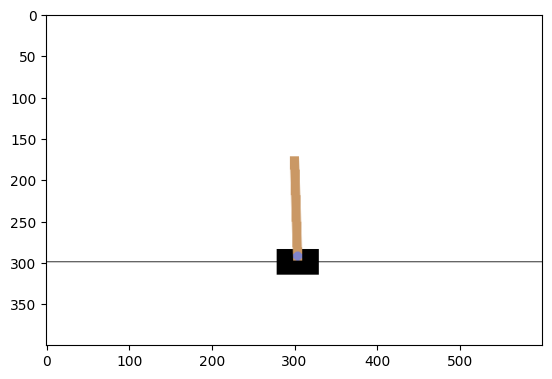

In [15]:
plt.imshow(img)